In [88]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scipy
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1

1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:
1.	Which are the teams which started playing between 1930-1980?

2.	Which are the top 5 teams in terms of points?

3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.


In [95]:
df = pd.read_csv("Laliga.csv",skiprows=1)

In [57]:
df

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,-,-,4,5,2,5,16,1929,1994-95,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,-,1,4,5,4,4,18,1939-40,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,-,2,3,4,4,14,1932-33,2015-16,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
Pos              61 non-null int64
Team             61 non-null object
Seasons          61 non-null int64
Points           61 non-null object
GamesPlayed      61 non-null object
GamesWon         61 non-null object
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Debut            61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null int64
dtypes: int64(3), object(17)
memory usage: 9.6+ KB


In [96]:
df = df.replace("-",0)

In [97]:
df.describe(include="all")

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
count,61.000000,61,61.000000,61,61,61,61,61,61,61,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61,61,61.000000
unique,NaN,61,NaN,61,53,59,57,56,60,61,8.0,10.0,9.0,9.0,9.0,9.0,21.0,45,37,NaN
top,NaN,Europa,NaN,42,30,7,16,37,70,366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1929,2015-16,NaN
freq,NaN,1,NaN,1,3,2,2,3,2,1,52.0,48.0,43.0,39.0,36.0,33.0,28.0,10,6,NaN
mean,31.000000,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.081967
std,17.752934,NaN,26.827225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.276663
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,16.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,31.000000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,46.000000,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


In [98]:
df.isnull().sum()

Pos              0
Team             0
Seasons          0
Points           0
GamesPlayed      0
GamesWon         0
GamesDrawn       0
GamesLost        0
GoalsFor         0
GoalsAgainst     0
Champion         0
Runner-up        0
Third            0
Fourth           0
Fifth            0
Sixth            0
T                0
Debut            0
Since/LastApp    0
BestPosition     0
dtype: int64

In [61]:
df.Team.unique()

array(['Real Madrid', 'Barcelona', 'Atletico Madrid', 'Valencia',
       'Athletic Bilbao', 'Sevilla', 'Espanyol', 'Real Sociedad',
       'Zaragoza', 'Real Betis', 'Deportivo La Coruna', 'Celta Vigo',
       'Valladolid', 'Racing Santander', 'Sporting Gijon', 'Osasuna',
       'Malaga', 'Oviedo', 'Mallorca', 'Las Palmas', 'Villarreal',
       'Granada', 'Rayo Vallecano', 'Elche', 'Getafe', 'Hercules',
       'Tenerife', 'Murcia', 'Alaves', 'Levante', 'Salamanca', 'Sabadell',
       'Cadiz', 'Logrones', 'Castellon', 'Albacete', 'Almeria', 'Cordoba',
       'Compostela', 'Recreativo', 'Burgos CF', 'Pontevedra', 'Numancia',
       'Eibar', 'Arenas', 'Real Burgos', 'Gimnastic', 'Extremadura',
       'Merida', 'Alcoyano', 'Jaen', 'Real Union', 'AD Almeria', 'Europa',
       'Lleida', 'Leganes', 'Xerez', 'Condal', 'Atletico Tetuan',
       'Cultural Leonesa', 'Girona'], dtype=object)

In [62]:
df.columns

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut',
       'Since/LastApp', 'BestPosition'],
      dtype='object')

#### A1. Which are the teams which started playing between 1930-1980?

In [113]:
df1 = df.Debut.str.split("-",expand=True)
df["debut"] = df1[0]

In [116]:
df.drop("Debut",axis=1,inplace=True)

In [124]:
df.head(7)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Since/LastApp,BestPosition,debut
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1,1929
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1,1929
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,2002-03,1,1929
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1987-88,1,1931
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1,1929
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,2001-02,1,1934
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,16,1994-95,3,1929


In [133]:
df[(df["debut"]>="1930")&(df["debut"]<="1980")]["Team"]

3                Valencia
5                 Sevilla
8                Zaragoza
9              Real Betis
10    Deportivo La Coruna
11             Celta Vigo
12             Valladolid
14         Sporting Gijon
15                Osasuna
16                 Malaga
17                 Oviedo
18               Mallorca
19             Las Palmas
21                Granada
22         Rayo Vallecano
23                  Elche
25               Hercules
26               Tenerife
27                 Murcia
28                 Alaves
29                Levante
30              Salamanca
31               Sabadell
32                  Cadiz
34              Castellon
37                Cordoba
39             Recreativo
40              Burgos CF
41             Pontevedra
46              Gimnastic
49               Alcoyano
50                   Jaen
52             AD Almeria
54                 Lleida
57                 Condal
58        Atletico Tetuan
59       Cultural Leonesa
Name: Team, dtype: object

#### A2. Which are the top 5 teams in terms of points?

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
Pos              61 non-null int64
Team             61 non-null object
Seasons          61 non-null int64
Points           61 non-null object
GamesPlayed      61 non-null object
GamesWon         61 non-null object
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null int64
debut            61 non-null object
dtypes: int64(3), object(17)
memory usage: 9.6+ KB


In [141]:
df["Points"] = df.Points.astype(int)

In [142]:
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Since/LastApp,BestPosition,debut
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1,1929
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1,1929
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,2002-03,1,1929
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1987-88,1,1931
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1,1929


In [154]:
df.sort_values(by="Points",ascending=False)[["Team","Points"]].head()

,Team,Points
0,Real Madrid,4385
1,Barcelona,4262
2,Atletico Madrid,3442
3,Valencia,3386
4,Athletic Bilbao,3368


#### A3. What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [156]:
df["GamesWon"]=df["GamesWon"].astype(int)

In [157]:
df["GamesPlayed"]=df["GamesPlayed"].astype(int)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
Pos              61 non-null int64
Team             61 non-null object
Seasons          61 non-null int64
Points           61 non-null int32
GamesPlayed      61 non-null int32
GamesWon         61 non-null int32
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null int64
debut            61 non-null object
dtypes: int32(3), int64(3), object(14)
memory usage: 8.9+ KB


In [173]:
winning_percentage = (df.GamesWon/df.GamesPlayed)*100
w_p = winning_percentage.dropna()

In [186]:
df["winning_perc"] = df.w_p.replace(np.NaN,0)

In [188]:
df.drop("w_p",axis=1,inplace=True)

In [189]:
df.drop("winning_percentage",axis=1,inplace=True)

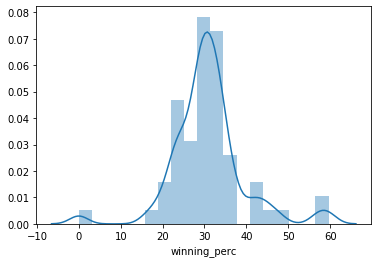

In [193]:
sns.distplot(df["winning_perc"])

In [196]:
df.sort_values(by="winning_perc",ascending=False)[["winning_perc","Team"]].head()

,winning_perc,Team
0,59.630702,Real Madrid
1,57.241130,Barcelona
2,47.475134,Atletico Madrid
3,44.557057,Valencia
4,43.772629,Athletic Bilbao


In [201]:
df.winning_perc.head(7)

0    59.630702
1    57.241130
2    47.475134
3    44.557057
4    43.772629
5    41.112957
6    36.100533
Name: winning_perc, dtype: float64

#### A4. Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [204]:
df3 = df.winning_perc[0:3]

In [205]:
df4 = df.winning_perc[3:7]

H0: There is no significant difference between the teams.

H1: There is significant difference between the teams.

Identifying test- T-Test,Two Tail Test

ttest = ?

In [208]:
ttest,pvalue = scipy.ttest_ind(df3,df4)

In [209]:
if (pvalue)<0.05:
    print("We fail to reject the null hypothesis(H0)")
else:
    print("We will reject the null hypothesis")

We fail to reject the null hypothesis(H0)


In [ ]:
# It means that there is no significant difference between the teams.

### Problem 2

A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

d)	Which of the two above intervals are wider?

e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

In [250]:
# Given:
n = 200
sample_mean = 140
sample_std = 25

In [213]:
# (a) Standard error:
Standard_Error = sample_std/np.sqrt(n)
print("Standard Error is: ",Standard_Error)

Standard Error is:  1.7677669529663687


In [241]:
# (b) 
# for confidence_level = 0.95, the z-value is 1.96
ul = sample_mean +(1.96*Standard_Error)
ll = sample_mean -(1.96*Standard_Error)

In [247]:
print("Upper Limit is:",ul)
print("Lower Limit is",ll)
print("The true mean blood pressure for all 60 year old women with glaucoma is in between:", ll,"&",ul,"with a confidence level of 95%")

Upper Limit is: 143.4648232278141
Lower Limit is 136.5351767721859
The true mean blood pressure for all 60 year old women with glaucoma is in between: 136.5351767721859 & 143.4648232278141 with a confidence level of 95%


In [249]:
# (c)
n1 = 100
# z value for confidence_level = 0.95 is 1.96

In [255]:
S_E = sample_std/np.sqrt(n1)
S_E

2.5

In [252]:
ul1 = sample_mean +(1.96*S_E)
ll1 = sample_mean -(1.96*S_E)

In [254]:
print("The true mean blood pressure for all 60 year old women with glaucoma with a n = 100 is in between:", ll1,"&",ul1,"with a confidence level of 95%")

The true mean blood pressure for all 60 year old women with glaucoma with a n = 100 is in between: 135.1 & 144.9 with a confidence level of 95%


In [256]:
# (d)
# We can see that as we decrease the sample size from 200 to 100, the standard error increases which means the interval
# between the true mean blood pressure also increases with reduced sample size.

In [259]:
# (e)
# It is very logical that, as the error increases in any subject - it means that the size of the interval also increases 
# as the range of error increases. As the sample size increases, it starts to exhibit much better properties and closer to
# the properties of the population.

### Problem 3

Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.

1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the 
current and new golf balls.

2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?


In [279]:
n_current = 40
n_new = 40
alpha = 0.05

In [262]:
golf = pd.read_csv("Golf.csv")

In [269]:
golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [270]:
golf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [271]:
golf.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


#### A1. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
Step1 - H0: The mean driving distances of current and new golf balls are the same. 

Step2 - H1: The mean driving distances of current and new golf balls are not the same.

#### A2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [273]:
# n is given, sample mean and sample std. deviation is given, so we are going to use t-test.

In [278]:
ttest,pvalue = scipy.ttest_ind(golf.Current,golf.New)
print("T-Test is:",ttest)
print("P-Value is:",pvalue)

T-Test is: 1.3283615935245678
P-Value is: 0.18793228491854663


In [281]:
if (pvalue>alpha):
    print("We fail to reject the null hypothesis")
else:
    print("We will reject the null hypothesis")

We fail to reject the null hypothesis


In [282]:
# This means that there is no difference between the mean driving distances of current and new gold balls.

#### A3. What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [286]:
current = golf.Current
current_std = current.std()
current_mean = current.mean()
print("Current Standard Deviation is:",current_std)
print("Current Mean is:",current_mean)

Current Standard Deviation is: 8.752984838884597
Current Mean is: 270.275


In [287]:
new = golf.New
new_std = new.std()
new_mean = new.mean()
print("New Standard Deviation is:",new_std)
print("New Mean is:",new_mean)

New Standard Deviation is: 9.896904462947894
New Mean is: 267.5


In [288]:
# The difference of means of the data is in the range of 267.5 to 270.275.